In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import colors
import os
import griottes


# Download the data with single-cell information

We download the single cell data. It is graciously provided by Nicolas Dray and the data has been privously published in "Dynamic spatiotemporal coordination of neural stem cell fate decisions occurs through local feedback in the adult vertebrate brain., *Cell Stem Cell*, Dray et al. (2021)".

In [2]:
import urllib3
import shutil

url = 'https://github.com/BaroudLab/Griottes/releases/download/v1.0-alpha/zebrafish_cell_properties.csv'
filename = 'zebrafish_cell_properties.csv'

if not os.path.exists(filename):
    c = urllib3.PoolManager()

    with c.request('GET',url, preload_content=False) as resp, open(filename, 'wb') as out_file:
        shutil.copyfileobj(resp, out_file)

    resp.release_conn()
else:
    print('dataset already exists')

dataset already exists


In [3]:
zebrafish_cell_properties = pandas.read_csv('zebrafish_cell_properties.csv')

For illustration purposes, we assign different colors to the different cell types:

In [4]:
n_colors = len(zebrafish_cell_properties.cell_type.unique())
color_list = [plt.cm.Set3(i) for i in range(n_colors)]
colors = [color_list[zebrafish_cell_properties.loc[i, 'cell_type']] for i in range(len(zebrafish_cell_properties))]

zebrafish_cell_properties['color'] = colors
zebrafish_cell_properties['legend'] = zebrafish_cell_properties['cell_properties']

# Create Delaunay network

We have prepared `zebrafish_cell_properties`, the dataframe containing the relevant single-cell data information. It is provided as an input to `griottes` which then generates a Delaunay network. 

In [12]:
descriptors = ['label', 'color', 'legend', 'x', 'y', 'z','cell_properties']

In [13]:
G = griottes.generate_delaunay_graph(zebrafish_cell_properties, 
                                     descriptors = descriptors, 
                                     distance=35,)

The generated network can be visualised using specific network visualisation tools:

no weights


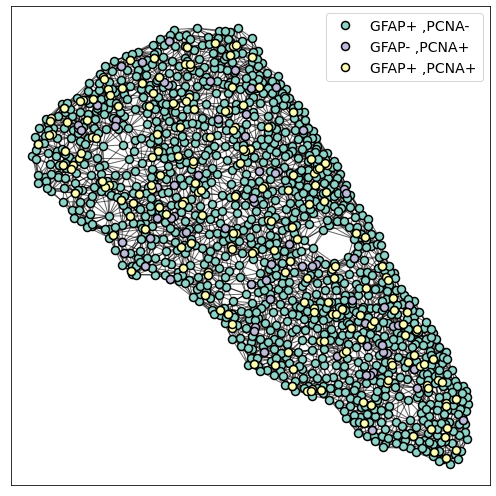

In [9]:
griottes.plot_2D(G,
                alpha_line = 0.6,
                scatterpoint_size = 8,
                legend = True,
                legend_fontsize = 14,
                figsize = (7,7))

plt.tight_layout()